# Merging Data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat

In [3]:
df1 = pd.read_csv('.../Code_Garage_(Trials)/New_House_Members_Record.csv',low_memory=False) #PR
#df2 = pd.read_csv('.../Code_Garage_(Trials)/New_House_Record.csv',low_memory=False) #HR
df3 = pd.read_csv('.../Code_Garage_(Trials)/New_Mens_Record.csv',low_memory=False) #MR
df4 = pd.read_csv('.../Code_Garage_(Trials)/New_Womens_Record.csv',low_memory=False)#WR

FileNotFoundError: [Errno 2] File .../Code_Garage_(Trials)/New_House_Members_Record.csv does not exist: '.../Code_Garage_(Trials)/New_House_Members_Record.csv'

## Way forward:

I realized that according to the picture that we have:

<img src ='Structure.jpeg'>

And this one below:

<img src ='Today.png'>

What is to be noticed in these images is this:
- In order to get a unique household we need to consider the `hhid` which is a combination of the **`Cluser Number`** and **`Household Number`**.
- In order to get a unique member in a household we would need to add to **`hhid`** the **`Household Line Number`**

## Merge Plan:-

- It should be noted that the characteristics in the Household are with in the `Household Members` dataset, so we don't need to merge the Household dataset with the Household Members dataset otherwise we will have duplicates.
- First I will remove the age ranges I need in the Household Members data because that is where the age variable is.
- I will then proceed to combine the Male and Female using a merge function how = "inner" I need the merge function to keep the cases that are common to both datasets: to be specific I will be merging according to  **`Cluser Number` + `Household Number` + `Household Line Number`**
- Please note, all the variables in House record are the same in House members record, so we can use one and leave the other.

## House Members Record

In [3]:
df1.head(3)

,Unnamed: 0,Age_of_household_members,Respondent's_line_number_(answering_Household_questionnaire),Wealth_index,Case_Identification,Cluster_number,Household_number,Region,Type_of_place_of_residence,Place_of_residence,...,Food_cooked_on_stove_or_open_fire,"Household_has_a_chimney,_hood_or_neither",Household_has_separate_room_used_as_kitchen,Household_has_a_cassette_player,Household_has_a_table,Household_has_a_chair,Household_has_a_bed,Household_has_a_cupboard,Household_has_a_clock,Household_has_a_boat_without_a_motor
0,0,25.0,1.0,5.0,1 2,1.0,2.0,1.0,1.0,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,24.0,1.0,5.0,1 2,1.0,2.0,1.0,1.0,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2,41.0,1.0,5.0,1 4,1.0,4.0,1.0,1.0,NaN,...,NaN,NaN,NaN,0.0,1.0,0.0,1.0,1.0,0.0,0.0


## Men's Record

In [4]:
df3.head(3)

,Unnamed: 0,Case_Identification,Respondent's_line_number,Cluster_number,Household_number,Highest_level_of_education_attained,Age_of_wife/partner,Age_of_wife/partner.1,Age_of_wife/partner.2,Age_of_wife/partner.3,...,NA_-_Alcohol_consumption_at_last_sex_with_2nd_to_most_recent_partner,NA_-_Alcohol_consumption_at_last_sex_with_3rd_to_most_recent_partner,Total_lifetime_number_of_sex_partners,NA_-_Most_young_men_wait_for_sex_until_marriage,Concurrent_sexual_partners,Cumulative_concurrent_sexual_partners,Weight_for_Domestic_Violence_(6_decimals),Experienced_any_severe_violence_(D105D-F)_by_wife/partner,"Experienced_any_sexual_violence_(D105H-I,K)_by_wife/partner",NA_-_Ever_participated_in_a_literacy_program_(excluding_primary_school)
0,0,119 3,3.0,1.0,19.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,706444.0,NaN,NaN,NaN
1,1,2 9 2,2.0,2.0,9.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1349895.0,0.0,0.0,NaN
2,2,2 9 3,3.0,2.0,9.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Women's Record

In [6]:
df4.head(3)

,Unnamed: 0,Case_Identification,Respondent's_line_number,Cluster_number,Household_number,Highest_level_of_education_attained,Age_of_wife/partner,Age_of_wife/partner.1,Age_of_wife/partner.2,Age_of_wife/partner.3,...,NA_-_Alcohol_consumption_at_last_sex_with_2nd_to_most_recent_partner,NA_-_Alcohol_consumption_at_last_sex_with_3rd_to_most_recent_partner,Total_lifetime_number_of_sex_partners,NA_-_Most_young_men_wait_for_sex_until_marriage,Concurrent_sexual_partners,Cumulative_concurrent_sexual_partners,Weight_for_Domestic_Violence_(6_decimals),Experienced_any_severe_violence_(D105D-F)_by_wife/partner,"Experienced_any_sexual_violence_(D105H-I,K)_by_wife/partner",NA_-_Ever_participated_in_a_literacy_program_(excluding_primary_school)
0,0,119 3,3.0,1.0,19.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,706444.0,NaN,NaN,NaN
1,1,2 9 2,2.0,2.0,9.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1349895.0,0.0,0.0,NaN
2,2,2 9 3,3.0,2.0,9.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#deleting the Unnamed column
df4.drop(columns=['Unnamed: 0'],inplace=True)

# Merge Data

First we will go through the household dataset and remove the age ranges we are not interested in

In [9]:
list(range(15,26))

[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]

In [10]:
subset = list(range(15,26))

In [11]:
 #we make a subset of the data based on the age ranges that we want
    dt = df1[df1['Age_of_household_members'].isin(subset)]

In [12]:
#lets check the age to make sure there are no missing values
dt.Age_of_household_members.isnull().sum()

0

### Let's now merge this new data dt to the males record

We are going to consider the following columns: **`Cluser Number` + `Household Number` + `Household Line Number`** as we merge

In [13]:
dt.head(2)

,Unnamed: 0,Age_of_household_members,Respondent's_line_number_(answering_Household_questionnaire),Wealth_index,Case_Identification,Cluster_number,Household_number,Region,Type_of_place_of_residence,Place_of_residence,...,Food_cooked_on_stove_or_open_fire,"Household_has_a_chimney,_hood_or_neither",Household_has_separate_room_used_as_kitchen,Household_has_a_cassette_player,Household_has_a_table,Household_has_a_chair,Household_has_a_bed,Household_has_a_cupboard,Household_has_a_clock,Household_has_a_boat_without_a_motor
0,0,25.0,1.0,5.0,1 2,1.0,2.0,1.0,1.0,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,24.0,1.0,5.0,1 2,1.0,2.0,1.0,1.0,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [14]:
df3.head(2)

,Unnamed: 0,Case_Identification,Respondent's_line_number,Cluster_number,Household_number,Highest_level_of_education_attained,Age_of_wife/partner,Age_of_wife/partner.1,Age_of_wife/partner.2,Age_of_wife/partner.3,...,NA_-_Alcohol_consumption_at_last_sex_with_3rd_to_most_recent_partner,Total_lifetime_number_of_sex_partners,NA_-_Most_young_men_wait_for_sex_until_marriage,Concurrent_sexual_partners,Cumulative_concurrent_sexual_partners,Weight_for_Domestic_Violence_(6_decimals),Experienced_any_severe_violence_(D105D-F)_by_wife/partner,"Experienced_any_sexual_violence_(D105H-I,K)_by_wife/partner",NA_-_Ever_participated_in_a_literacy_program_(excluding_primary_school),Gender
0,0,119 3,3.0,1.0,19.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,706444.0,NaN,NaN,NaN,M
1,1,2 9 2,2.0,2.0,9.0,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1349895.0,0.0,0.0,NaN,M


In [15]:
mgr = pd.merge(dt,df3, left_on=['Cluster_number' , 'Household_number' ,"Respondent's_line_number_(answering_Household_questionnaire)"], right_on=['Cluster_number' , 'Household_number' ,"Respondent's_line_number"], suffixes=("_hse","_male"))

In [16]:
#shape of the merger
mgr.shape

(861, 171)

In [17]:
#let's now add the women's dataset
df4.head(2)

,Case_Identification,Respondent's_line_number,Cluster_number,Household_number,Highest_level_of_education_attained,Age_of_wife/partner,Age_of_wife/partner.1,Age_of_wife/partner.2,Age_of_wife/partner.3,Age_of_wife/partner.4,...,NA_-_Alcohol_consumption_at_last_sex_with_3rd_to_most_recent_partner,Total_lifetime_number_of_sex_partners,NA_-_Most_young_men_wait_for_sex_until_marriage,Concurrent_sexual_partners,Cumulative_concurrent_sexual_partners,Weight_for_Domestic_Violence_(6_decimals),Experienced_any_severe_violence_(D105D-F)_by_wife/partner,"Experienced_any_sexual_violence_(D105H-I,K)_by_wife/partner",NA_-_Ever_participated_in_a_literacy_program_(excluding_primary_school),Gender
0,119 3,3.0,1.0,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,706444.0,NaN,NaN,NaN,F
1,2 9 2,2.0,2.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1349895.0,0.0,0.0,NaN,F


In [18]:
mgr.head(2)

,Unnamed: 0_hse,Age_of_household_members,Respondent's_line_number_(answering_Household_questionnaire),Wealth_index_hse,Case_Identification_hse,Cluster_number,Household_number,Region,Type_of_place_of_residence,Place_of_residence,...,NA_-_Alcohol_consumption_at_last_sex_with_3rd_to_most_recent_partner,Total_lifetime_number_of_sex_partners,NA_-_Most_young_men_wait_for_sex_until_marriage,Concurrent_sexual_partners,Cumulative_concurrent_sexual_partners,Weight_for_Domestic_Violence_(6_decimals),Experienced_any_severe_violence_(D105D-F)_by_wife/partner,"Experienced_any_sexual_violence_(D105H-I,K)_by_wife/partner",NA_-_Ever_participated_in_a_literacy_program_(excluding_primary_school),Gender
0,11,20.0,3.0,5.0,119,1.0,19.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,706444.0,NaN,NaN,NaN,M
1,52,23.0,2.0,5.0,2 9,2.0,9.0,1.0,1.0,NaN,...,NaN,1.0,NaN,NaN,NaN,1349895.0,0.0,0.0,NaN,M


In [19]:
fin = pd.merge(mgr, df4, left_on=['Cluster_number','Household_number',"Respondent's_line_number_(answering_Household_questionnaire)"],right_on=['Cluster_number','Household_number',"Respondent's_line_number"])

In [20]:
#the final merge has a shape of
fin.shape

(861, 287)

## Visualize to see the missing info

In [21]:
import missingno as mno

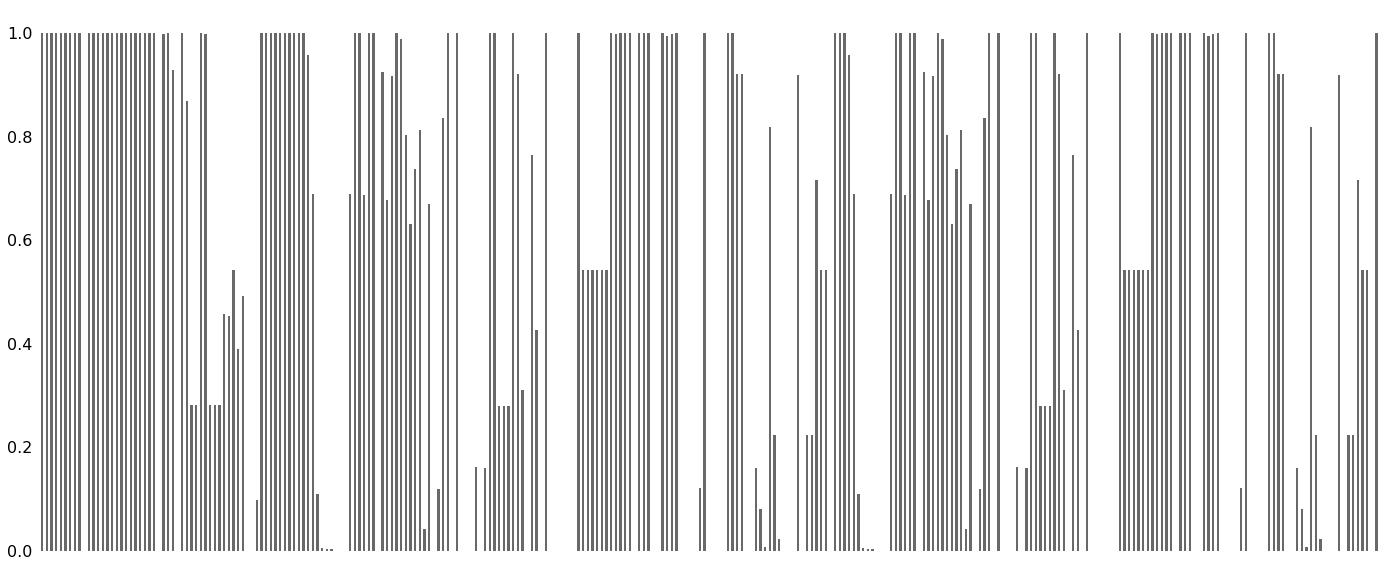

In [22]:
mno.bar(fin)

In [23]:
#let us remove the empty columns
fin = fin.dropna(axis='columns',how="all")

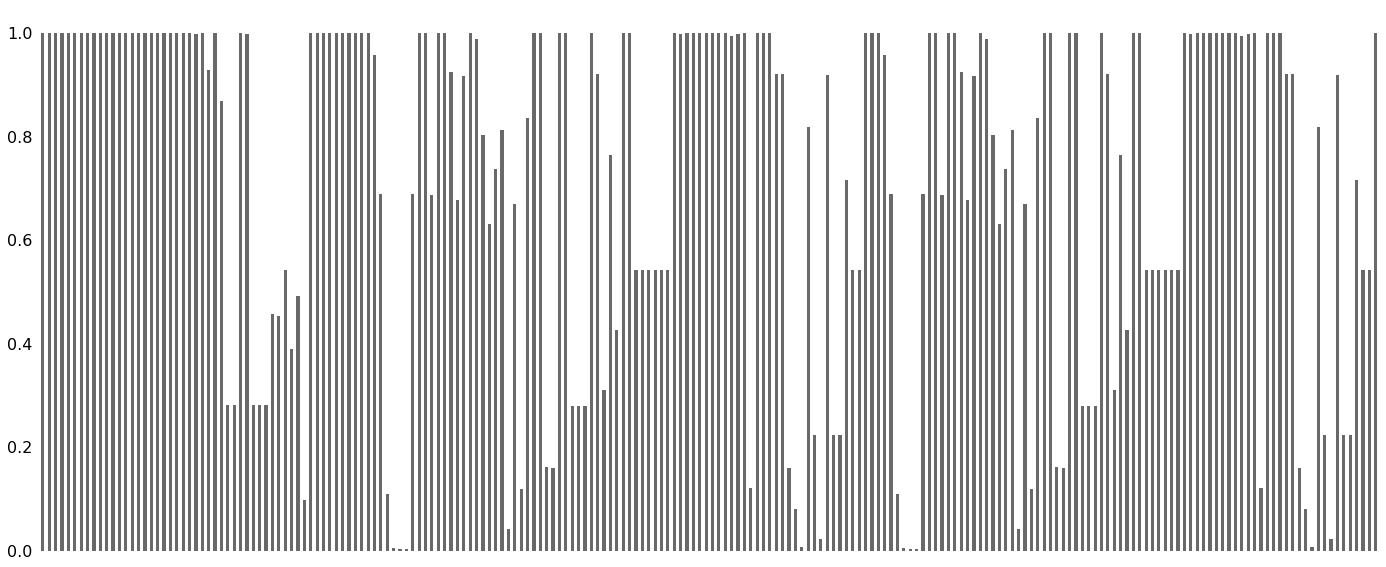

In [24]:
mno.bar(fin)

In [25]:
#transform to csv
fin.to_csv("Final_dt.csv")